In [21]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


sns.set(rc={'figure.figsize':(20,14)})

In [2]:
data_folder = "../data/segmentEncodingResults24022021"

def fancy_name(benchmark_name: str):
    return benchmark_name.split("/")[-1].replace("tpch_", "").replace(".json", "").replace("_1", "").replace("_LTO", "")

high_level: DataFrame = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level["with_lto"] = ["LTO" in benchmark_run_name for benchmark_run_name in high_level["benchmark_run_name"]]
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,with_lto
2,segmentEncodingResults24022021/tpch_Dictionary...,2.762939e+09,1.052994,Dictionary,False
15,segmentEncodingResults24022021/tpch_Dictionary...,2.633041e+09,1.106743,Dictionary,True
9,segmentEncodingResults24022021/tpch_FrameOfRef...,2.391900e+09,1.189684,FrameOfReference,False
13,segmentEncodingResults24022021/tpch_FrameOfRef...,2.316388e+09,1.292986,FrameOfReference,True
8,segmentEncodingResults24022021/tpch_LZ4_1.json,1.379045e+10,0.331079,LZ4,False
12,segmentEncodingResults24022021/tpch_LZ4_LTO_1....,1.456059e+10,0.317847,LZ4,True
3,segmentEncodingResults24022021/tpch_RunLength_...,3.475300e+09,0.933002,RunLength,False
1,segmentEncodingResults24022021/tpch_RunLength_...,3.464199e+09,0.943670,RunLength,True
11,segmentEncodingResults24022021/tpch_SIMDCAI_1....,2.457726e+09,1.115037,SIMDCAI,False
10,segmentEncodingResults24022021/tpch_SIMDCAI_LT...,2.354898e+09,1.225848,SIMDCAI,True


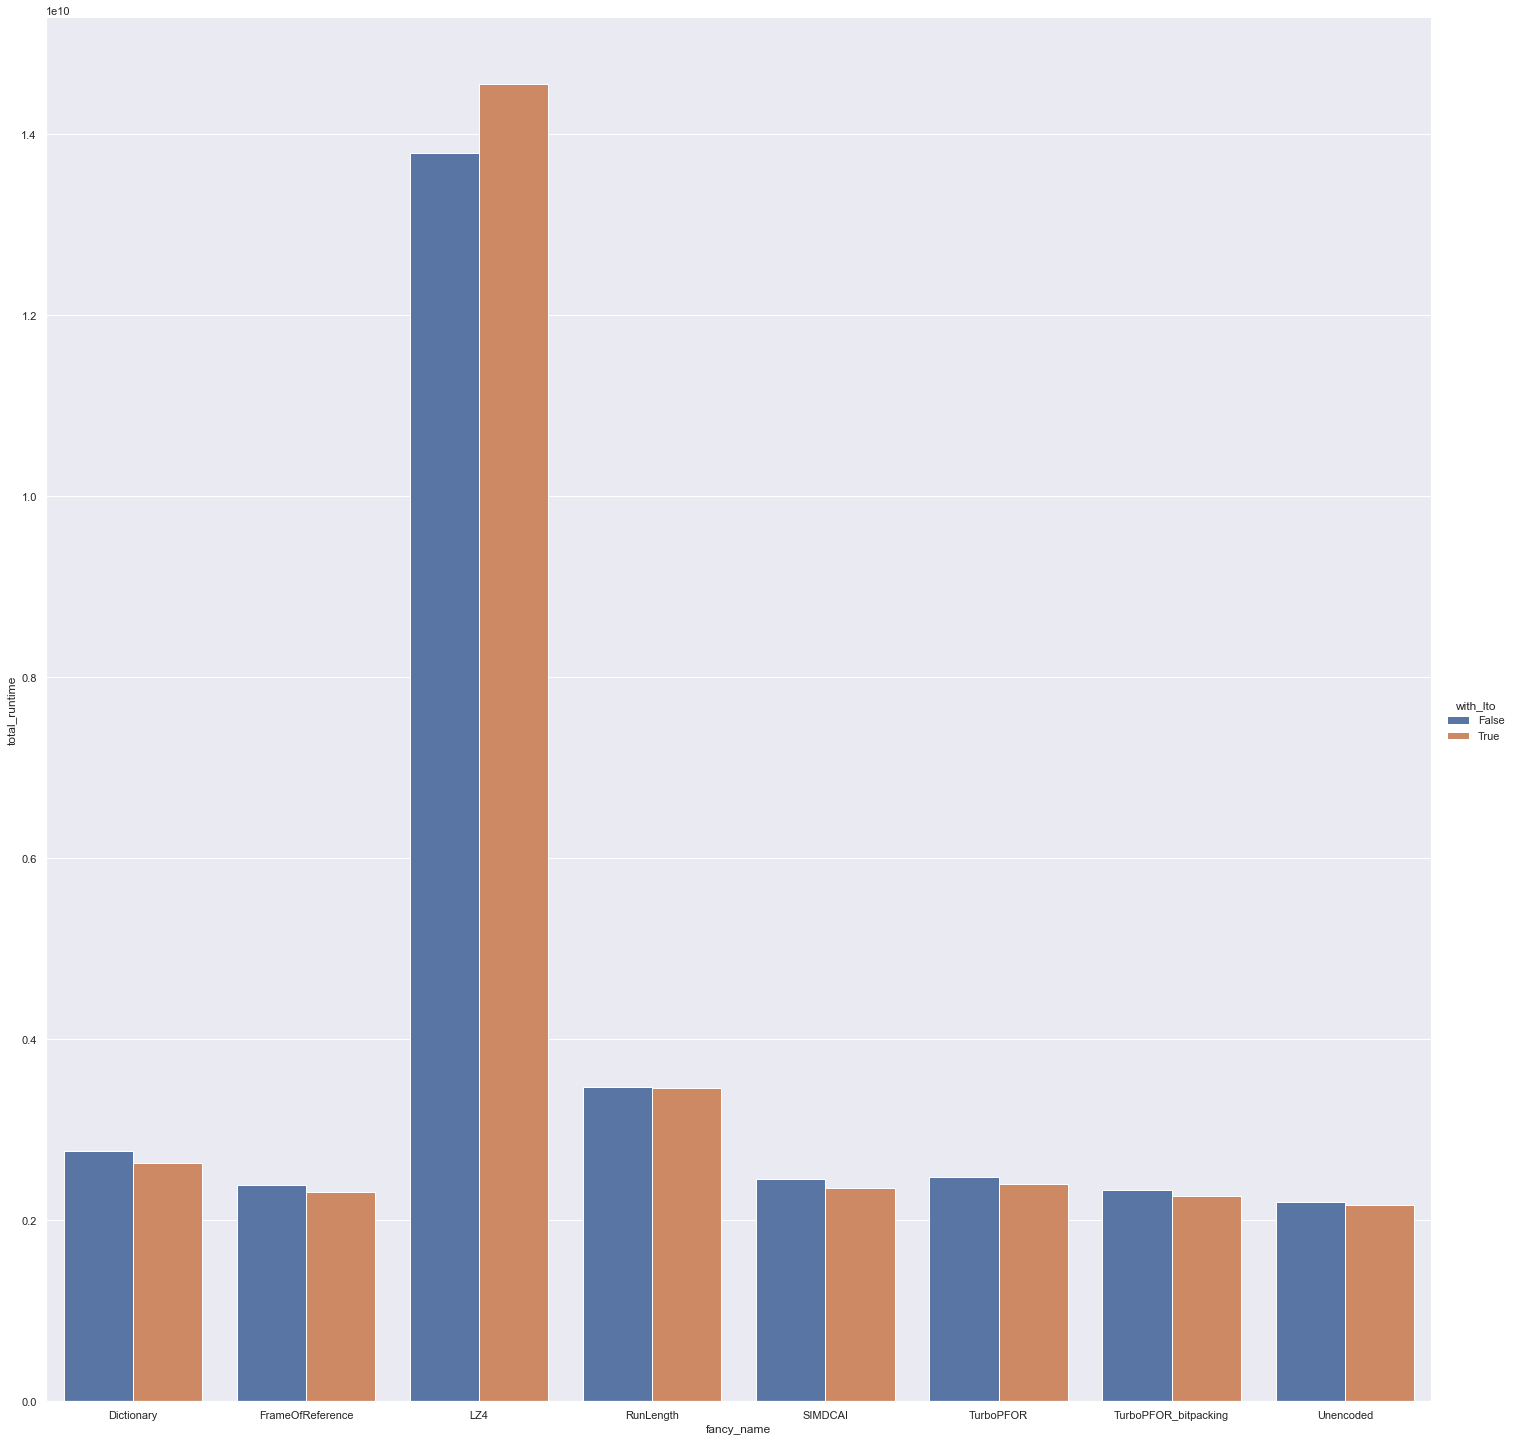

In [9]:
sns.catplot(data=high_level, kind="bar", x="fancy_name", y="total_runtime", hue="with_lto", height=20)

In [38]:
low_level: DataFrame = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")
low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(LZ4|RunLength).*")]
low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [b.replace("TPC-H ", "") for b in low_level["query_name"]]
low_level["with_lto"] = ["LTO" in benchmark_run_name for benchmark_run_name in low_level["benchmark_run_name"]]
low_level = low_level[low_level["with_lto"] == True]
low_level

,benchmark_run_name,query_name,avg_duration,throughput,fancy_name,with_lto
0,segmentEncodingResults24022021/tpch_TurboPFOR_...,01,6.406740e+09,0.156085,TurboPFOR_bitpacking,True
286,segmentEncodingResults24022021/tpch_FrameOfRef...,01,6.197228e+09,0.161362,FrameOfReference,True
220,segmentEncodingResults24022021/tpch_SIMDCAI_LT...,01,6.496886e+09,0.153916,SIMDCAI,True
330,segmentEncodingResults24022021/tpch_Dictionary...,01,6.108308e+09,0.163711,Dictionary,True
132,segmentEncodingResults24022021/tpch_Unencoded_...,01,6.264309e+09,0.159634,Unencoded,True
...,...,...,...,...,...,...
241,segmentEncodingResults24022021/tpch_SIMDCAI_LT...,22,5.995067e+08,1.668015,SIMDCAI,True
153,segmentEncodingResults24022021/tpch_Unencoded_...,22,5.844553e+08,1.710972,Unencoded,True
131,segmentEncodingResults24022021/tpch_TurboPFOR_...,22,5.914618e+08,1.690705,TurboPFOR,True
21,segmentEncodingResults24022021/tpch_TurboPFOR_...,22,5.992244e+08,1.668800,TurboPFOR_bitpacking,True


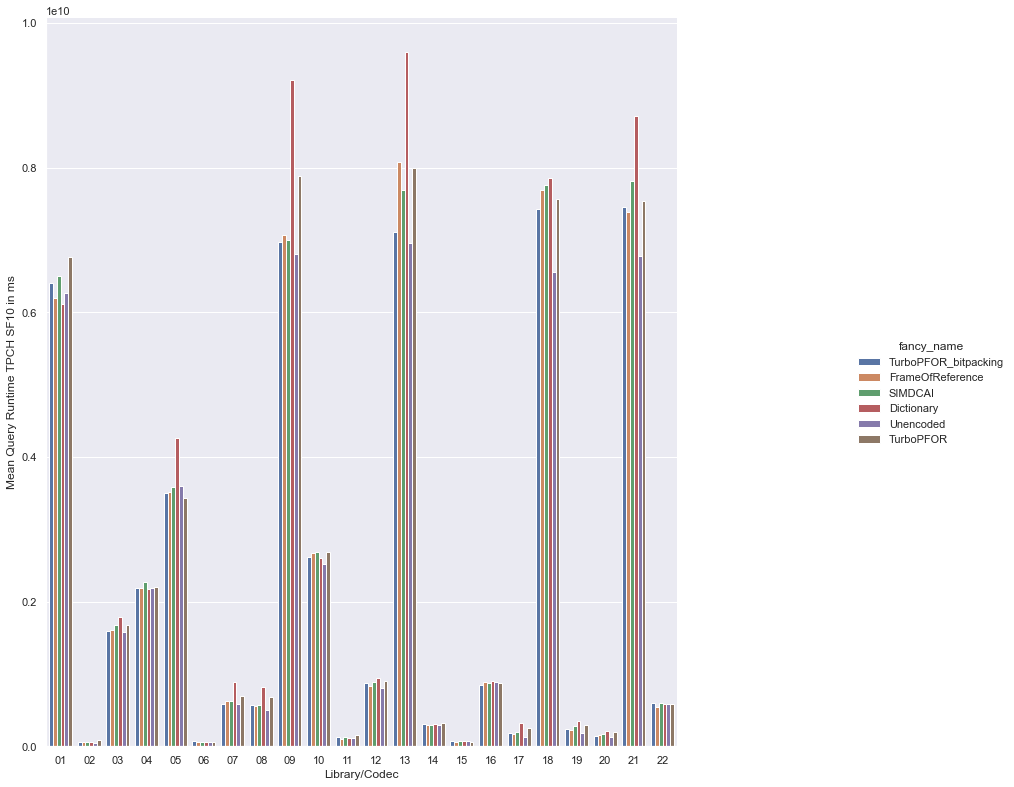

In [39]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="fancy_name")
plot.set_axis_labels("Library/Codec", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(15,12)
plt.savefig(f"visualizations/tpch_compression_low_level_absolute.svg", format="svg")

In [29]:
low_level_nolto = low_level[~low_level["benchmark_run_name"].str.match(".*(LTO|RunLength).*")]
default_query_durations = low_level_nolto[low_level_nolto["benchmark_run_name"].str.match(".*fsba_1.*")]

low_level_nolto = low_level_nolto.merge(default_query_durations, how="left", left_on="query_name", right_on="query_name")
low_level_nolto["duration_percentage"] = low_level_nolto["avg_duration_x"] / low_level_nolto["avg_duration_y"]
low_level_nolto_nodefault = low_level_nolto[~low_level_nolto["benchmark_run_name_x"].str.match(".*fsba.*")]

low_level_nolto_nodefault

,benchmark_run_name_x,query_name,avg_duration_x,throughput_x,fancy_name_x,benchmark_run_name_y,avg_duration_y,throughput_y,fancy_name_y,duration_percentage
0,segmentEncodingResults24022021/tpch_TurboPFOR_...,01,6.517420e+09,0.153433,TurboPFOR,NaN,NaN,NaN,NaN,NaN
1,segmentEncodingResults24022021/tpch_FrameOfRef...,01,6.514225e+09,0.153510,FrameOfReference,NaN,NaN,NaN,NaN,NaN
2,segmentEncodingResults24022021/tpch_TurboPFOR_...,01,6.506432e+09,0.153694,TurboPFOR_bitpacking,NaN,NaN,NaN,NaN,NaN
3,segmentEncodingResults24022021/tpch_Unencoded_...,01,6.246930e+09,0.160078,Unencoded,NaN,NaN,NaN,NaN,NaN
4,segmentEncodingResults24022021/tpch_SIMDCAI_1....,01,6.475540e+09,0.154423,SIMDCAI,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
127,segmentEncodingResults24022021/tpch_SIMDCAI_1....,22,5.668517e+08,1.764104,SIMDCAI,NaN,NaN,NaN,NaN,NaN
128,segmentEncodingResults24022021/tpch_FrameOfRef...,22,6.355386e+08,1.573446,FrameOfReference,NaN,NaN,NaN,NaN,NaN
129,segmentEncodingResults24022021/tpch_Unencoded_...,22,5.756843e+08,1.737037,Unencoded,NaN,NaN,NaN,NaN,NaN
130,segmentEncodingResults24022021/tpch_Dictionary...,22,6.210654e+08,1.610116,Dictionary,NaN,NaN,NaN,NaN,NaN


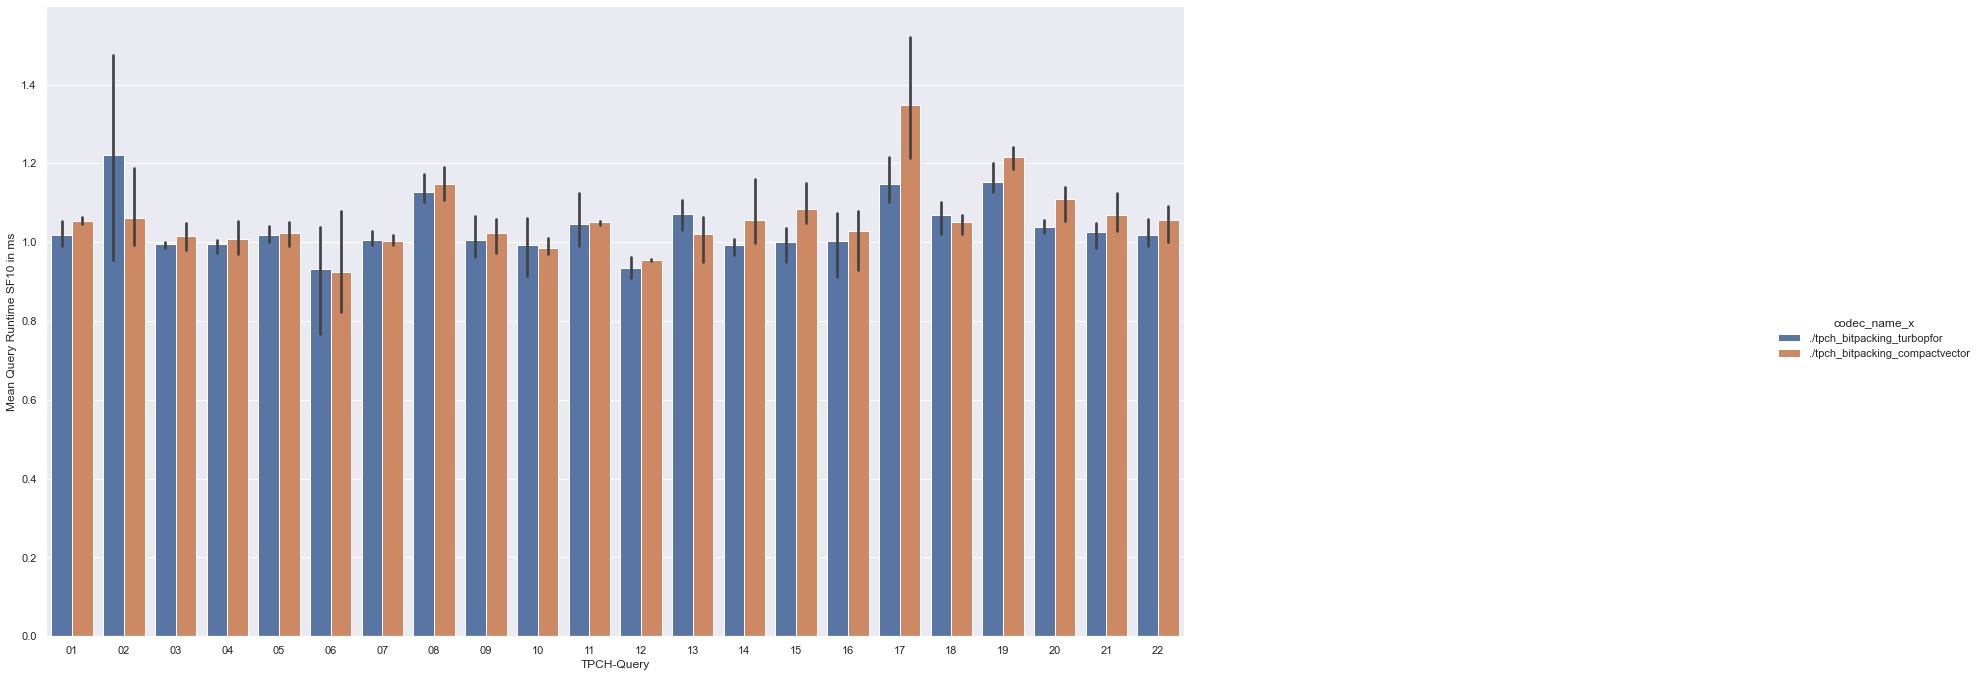

In [96]:
plot = sns.catplot(data=low_level_nolto_nodefault, x="query_name", y="duration_percentage", kind="bar", hue="fancy_name_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,10)
plt.savefig(f"visualizations/tpch_compression_low_level_percentage.svg", format="svg")